Student: Denny Boechat.

Course: Advanced Big Data and Data Mining (MSCS-634-B01).

Lab 4: Regression Analysis with Regularization Techniques

Step 1: Data Preparation 

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [35]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [37]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [38]:
# Check for missing values
missing_counts = df.isnull().sum()
print("Missing values in each column:\n", missing_counts)

Missing values in each column:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


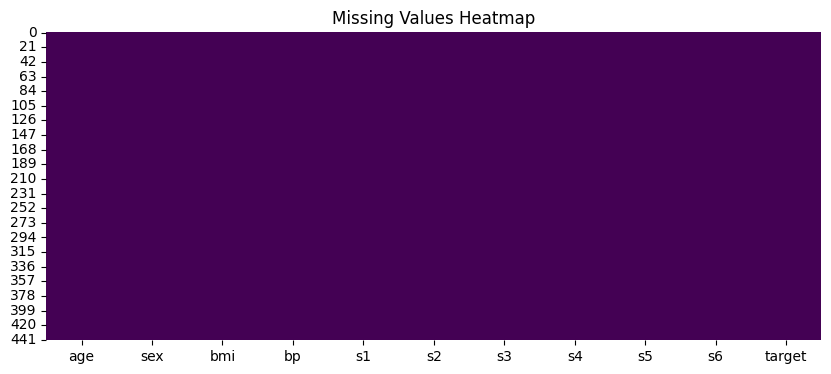

In [39]:
# Visualize missing data (just in case)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

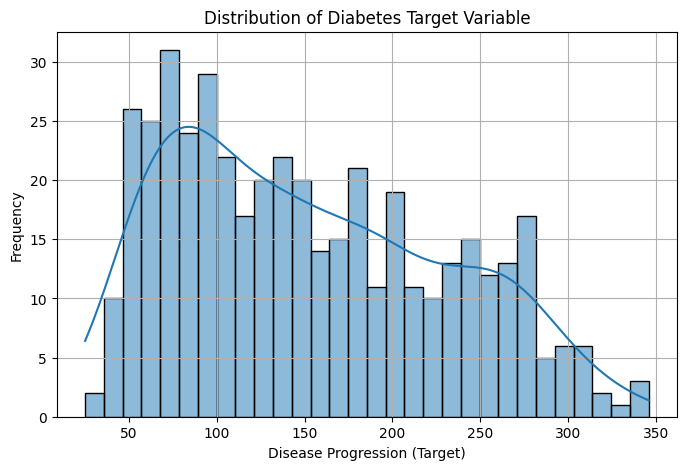

In [14]:
# Visualize the distribution of target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['target'], kde=True, bins=30)
plt.title('Distribution of Diabetes Target Variable')
plt.xlabel('Disease Progression (Target)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Step 2: Linear Regression 

In [40]:
# Train the Simple Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Using 'bmi' as feature
X = df[['bmi']]
y = df['target']

# Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 52.26
Mean Squared Error (MSE): 4061.83
Root Mean Squared Error (RMSE): 63.73
R² Score: 0.23


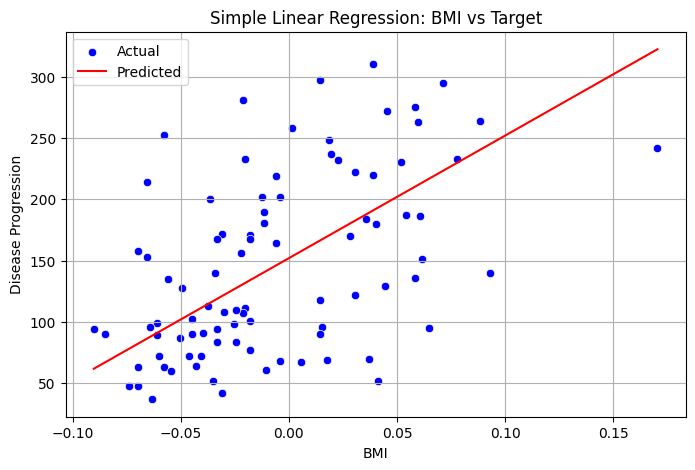

In [20]:
# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['bmi'], y=y_test, label='Actual', color='blue')
sns.lineplot(x=X_test['bmi'], y=y_pred, label='Predicted', color='red')
plt.title('Simple Linear Regression: BMI vs Target')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.grid(True)
plt.show()

Step 3: Multiple Regression 

In [41]:
# Use all features except the target
X = df.drop('target', axis=1)
y = df['target']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 42.79
Mean Squared Error (MSE): 2900.19
Root Mean Squared Error (RMSE): 53.85
R² Score: 0.45


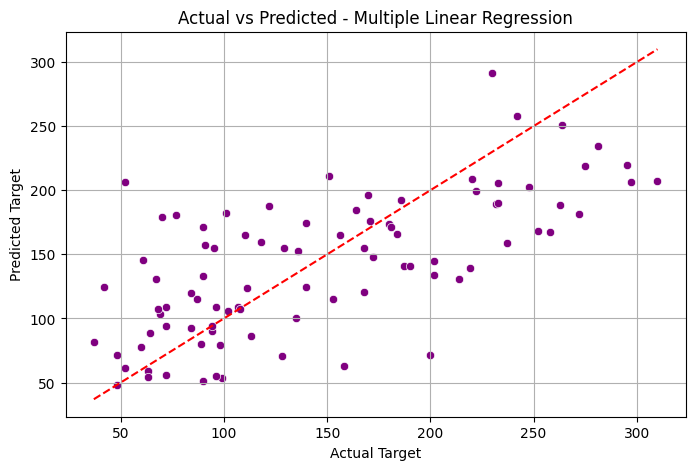

In [42]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree reference line
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs Predicted - Multiple Linear Regression')
plt.grid(True)
plt.show()

Step 4: Polynomial Regression 

/opt/homebrew/Cellar/jupyterlab/4.4.4/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.4.4/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.4.4/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.4.4/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.4.4/libexec/lib/python3.13/site-packages/sklearn/u

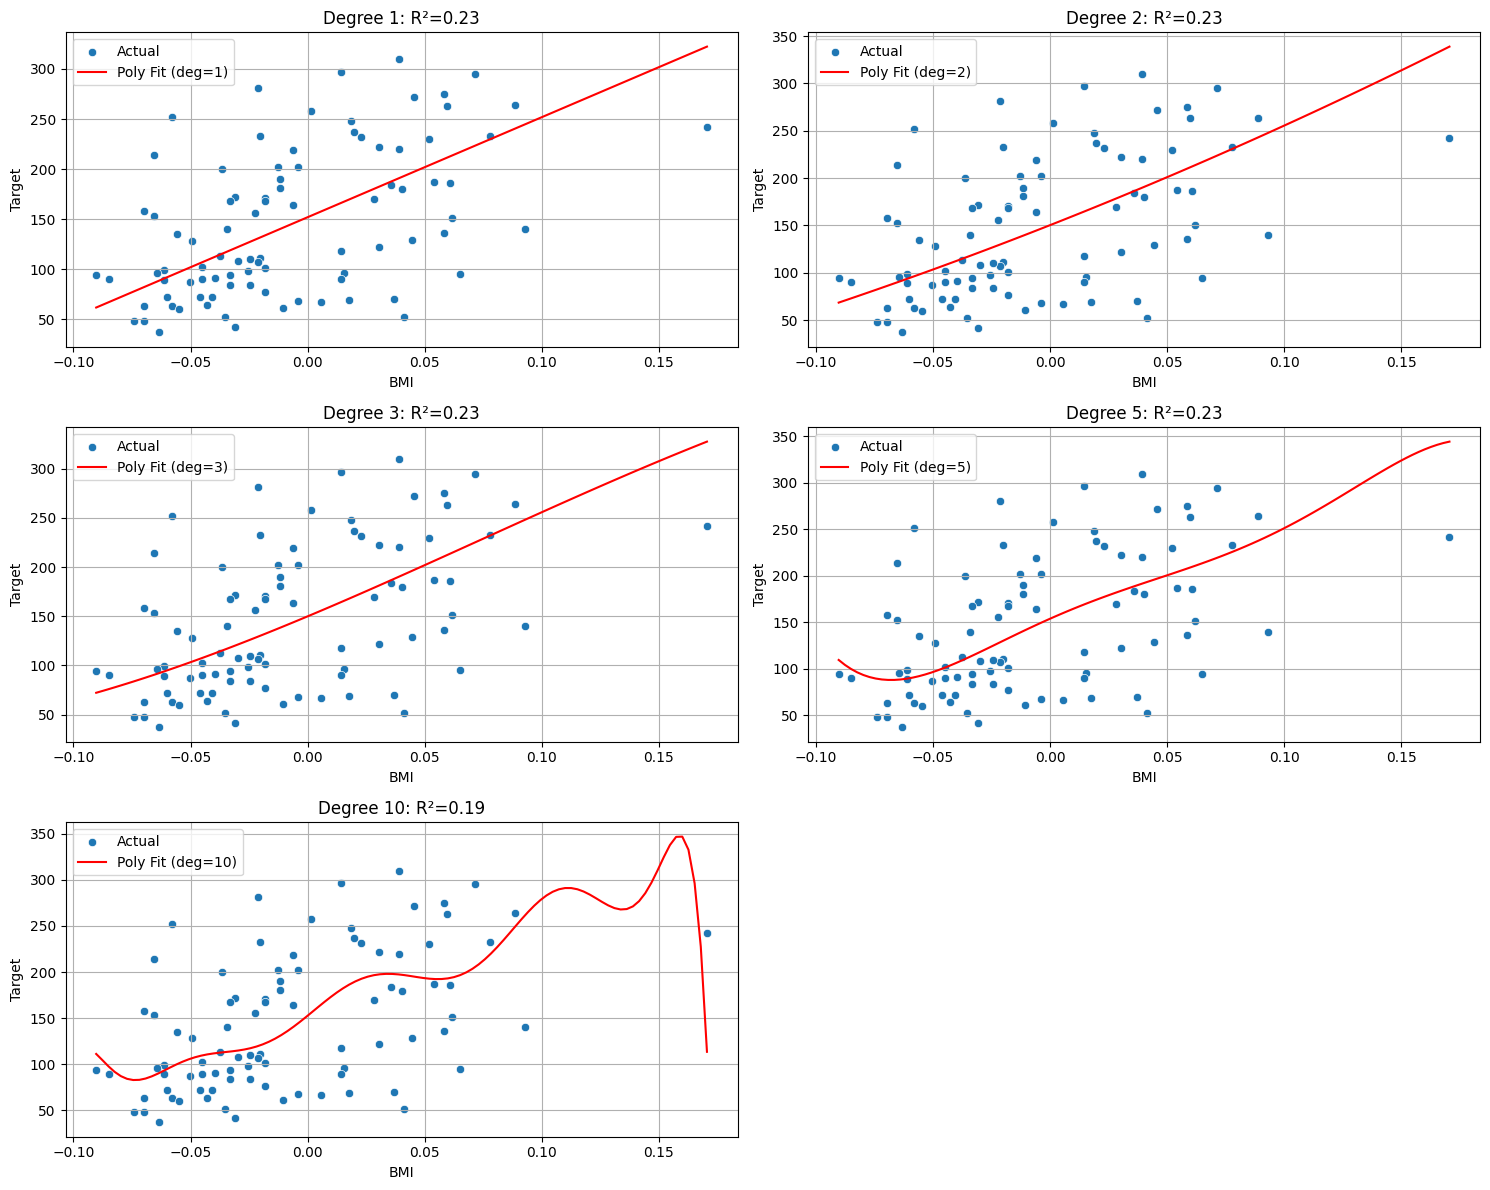

In [43]:
X = df[['bmi']]  # Single feature
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2, 3, 5, 10]
results = []

plt.figure(figsize=(15, 12))

for i, d in enumerate(degrees, 1):
    # Create a pipeline: PolynomialFeatures + LinearRegression
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append((d, mae, mse, rmse, r2))
    
    # Plot predictions
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_range_pred = model.predict(X_range)

    plt.subplot(3, 2, i)
    sns.scatterplot(x=X_test['bmi'], y=y_test, label='Actual')
    plt.plot(X_range, y_range_pred, color='red', label='Poly Fit (deg=' + str(d) + ')')
    plt.title(f'Degree {d}: R²={r2:.2f}')
    plt.xlabel('BMI')
    plt.ylabel('Target')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [44]:
# Compare Performance Across Degrees

results_df = pd.DataFrame(results, columns=['Degree', 'MAE', 'MSE', 'RMSE', 'R²'])
print(results_df)

   Degree        MAE          MSE       RMSE        R²
0       1  52.259976  4061.825928  63.732456  0.233350
1       2  52.383912  4085.025481  63.914204  0.228972
2       3  52.181400  4064.443384  63.752987  0.232856
3       5  51.884611  4085.845567  63.920619  0.228817
4      10  52.958880  4315.533060  65.692717  0.185464


Step 5: Regularization with Ridge and Lasso Regression 

In [45]:
from sklearn.linear_model import Ridge, Lasso

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0, max_iter=10000)

# Fit models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Evaluate
def evaluate_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Regression:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")
    return mae, mse, rmse, r2

ridge_metrics = evaluate_model(y_test, y_pred_ridge, "Ridge")
lasso_metrics = evaluate_model(y_test, y_pred_lasso, "Lasso")


Ridge Regression:
MAE: 46.14
MSE: 3077.42
RMSE: 55.47
R²: 0.42

Lasso Regression:
MAE: 49.73
MSE: 3403.58
RMSE: 58.34
R²: 0.36


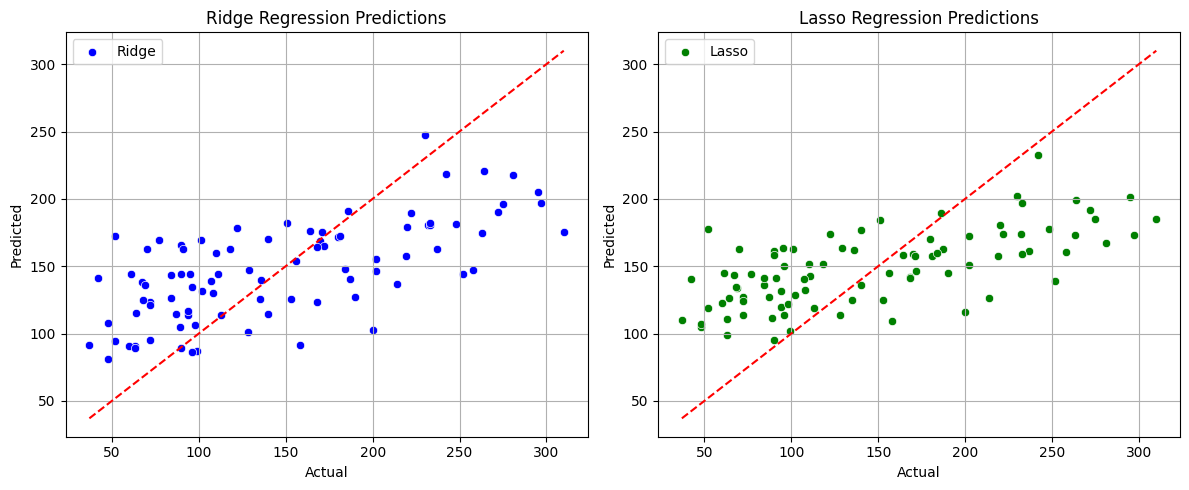

In [32]:
plt.figure(figsize=(12, 5))

# Ridge
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_ridge, color='blue', label='Ridge')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression Predictions')
plt.grid(True)

# Lasso
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_lasso, color='green', label='Lasso')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression Predictions')
plt.grid(True)

plt.tight_layout()
plt.show()

In [46]:
# Compare All Models

comparison_df = pd.DataFrame({
    'Model': ['Ridge', 'Lasso'],
    'MAE': [ridge_metrics[0], lasso_metrics[0]],
    'MSE': [ridge_metrics[1], lasso_metrics[1]],
    'RMSE': [ridge_metrics[2], lasso_metrics[2]],
    'R²': [ridge_metrics[3], lasso_metrics[3]],
})

print(comparison_df)

   Model        MAE          MSE       RMSE        R²
0  Ridge  46.138858  3077.415939  55.474462  0.419153
1  Lasso  49.730328  3403.575722  58.340172  0.357592
